
# Train GRU Model from WavLM features and continuous labels

### For Recola 2018 Train and Devel dataset

##### https://github.com/microsoft/unilm/tree/master/wavlm
##### https://github.com/audeering/w2v2-how-to/blob/main/notebook.ipynb

In [2]:
import pandas as pd
import numpy as np
import os

### Process Feature Files - Train and Devel

In [3]:
# Path to feature files
path_train = 'Recola2018_16k/features/train'
extension = 'wavlmbasefeatpoolloso'

train_files = [file for file in os.listdir(path_train) if file.endswith(extension)]

sorted_train_files = sorted(train_files)
sorted_train_files

['train_1.wavlmbasefeatpoolloso',
 'train_2.wavlmbasefeatpoolloso',
 'train_3.wavlmbasefeatpoolloso',
 'train_4.wavlmbasefeatpoolloso',
 'train_5.wavlmbasefeatpoolloso',
 'train_6.wavlmbasefeatpoolloso',
 'train_7.wavlmbasefeatpoolloso',
 'train_8.wavlmbasefeatpoolloso',
 'train_9.wavlmbasefeatpoolloso']

In [4]:
# Path to feature files
path_devel = 'Recola2018_16k/features/devel'
extension = 'wavlmbasefeatpoolloso'

devel_files = [file for file in os.listdir(path_devel) if file.endswith(extension)]

sorted_devel_files = sorted(devel_files)
sorted_devel_files

['dev_1.wavlmbasefeatpoolloso',
 'dev_2.wavlmbasefeatpoolloso',
 'dev_3.wavlmbasefeatpoolloso',
 'dev_4.wavlmbasefeatpoolloso',
 'dev_5.wavlmbasefeatpoolloso',
 'dev_6.wavlmbasefeatpoolloso',
 'dev_7.wavlmbasefeatpoolloso',
 'dev_8.wavlmbasefeatpoolloso',
 'dev_9.wavlmbasefeatpoolloso']

In [5]:
dfs = []
for file in sorted_train_files:
    df = pd.read_csv(os.path.join(path_train, file))
    
    # pad to make single feature files compatible with labels (2 lines for Recola)
    # pad the dataframe with a copy of the first row 
    new_row = pd.DataFrame(df.loc[0])

    # simply concatenate both dataframes
    df = pd.concat([new_row.T, df]).reset_index(drop = True)
    
    # pad the dataframe with a copy of the last row 
    new_row2 = pd.DataFrame(df.loc[len(df)-1])
    
    # simply concatenate both dataframes
    df = pd.concat([df,new_row2.T]).reset_index(drop = True)
    
    dfs.append(df)

df_train_feat = pd.concat(dfs, ignore_index=True)

# Drop first index column (unamed 0)
df_train_feat.drop(df_train_feat.columns[[0]], axis=1, inplace=True)

df_train_feat

,Subject,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,train_1,0.287043,0.052053,-0.02014,-0.083973,-0.00271,-0.094455,-0.007519,-0.009715,0.070949,...,0.036992,0.161464,0.085316,1.000897,0.171399,-0.057759,0.070285,0.12677,0.106141,0.604056
1,train_1,0.287043,0.052053,-0.02014,-0.083973,-0.00271,-0.094455,-0.007519,-0.009715,0.070949,...,0.036992,0.161464,0.085316,1.000897,0.171399,-0.057759,0.070285,0.12677,0.106141,0.604056
2,train_1,0.280631,0.019296,0.017815,-0.069037,0.012871,-0.100985,-0.062013,-0.02229,0.163397,...,-0.007101,0.155485,0.105061,1.245534,0.198035,-0.073335,0.138528,0.108111,0.125935,0.65975
3,train_1,0.260988,0.026328,0.004951,-0.050089,0.034633,-0.091831,-0.089229,0.035907,0.183416,...,-0.017694,0.157349,0.090947,1.277041,0.187295,-0.067804,0.121619,0.098807,0.129719,0.63274
4,train_1,0.189641,-0.038102,0.029187,-0.070187,0.016132,-0.096568,-0.152244,0.0664,0.25929,...,-0.046208,0.147277,0.131058,1.139375,0.224708,-0.03548,0.102886,0.097665,0.096764,0.771372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67504,train_9,-0.045178,-0.107187,-0.060478,-0.050455,0.103593,-0.024292,0.108691,-0.019609,0.062754,...,0.114766,-0.022182,-0.069816,1.633942,0.077471,0.010737,0.006188,-0.05356,-0.03882,0.1545
67505,train_9,-0.073346,0.025955,-0.132923,-0.077584,-0.009768,-0.083074,0.157465,0.018694,0.025926,...,0.022912,0.038415,0.141481,0.54351,0.010589,-0.040598,0.063158,-0.046928,-0.080123,0.323969
67506,train_9,-0.139441,0.0214,-0.115456,-0.085402,0.06427,0.06808,-0.064101,0.057752,-0.024166,...,-0.126446,0.007706,0.155883,-0.359285,-0.089562,0.034612,0.043575,-0.095033,-0.040739,-0.449713
67507,train_9,0.038998,0.13419,-0.185722,0.006425,0.049627,0.023687,0.11096,-0.046366,-0.000005,...,-0.158967,-0.133261,0.085344,-0.566554,-0.268961,0.049534,0.080955,-0.120617,-0.139615,1.417126


In [6]:
dfs_devel = []
for file in sorted_devel_files:
    df_devel = pd.read_csv(os.path.join(path_devel, file))
    
    # pad to make single feature files compatible with labels (2 lines for Recola)
    # pad the dataframe with a copy of the first row 
    new_row = pd.DataFrame(df_devel.loc[0])

    # simply concatenate both dataframes
    df_devel = pd.concat([new_row.T, df_devel]).reset_index(drop = True)
    
    # pad the dataframe with a copy of the last row 
    new_row2 = pd.DataFrame(df_devel.loc[len(df_devel)-1])
    
    # simply concatenate both dataframes
    df_devel = pd.concat([df_devel,new_row2.T]).reset_index(drop = True)
    
    dfs_devel.append(df_devel)
    
df_devel_feat = pd.concat(dfs_devel, ignore_index=True)

# Drop first index column (unamed 0)
df_devel_feat.drop(df_devel_feat.columns[[0]], axis=1, inplace=True)

df_devel_feat

,Subject,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,dev_1,0.238646,0.084087,0.028877,-0.078474,0.056739,-0.089691,-0.04333,-0.0899,0.143496,...,0.024183,0.171355,0.065592,1.195989,0.18741,-0.076942,0.015578,0.144548,0.005386,0.410032
1,dev_1,0.238646,0.084087,0.028877,-0.078474,0.056739,-0.089691,-0.04333,-0.0899,0.143496,...,0.024183,0.171355,0.065592,1.195989,0.18741,-0.076942,0.015578,0.144548,0.005386,0.410032
2,dev_1,0.211931,0.098341,0.085483,-0.053753,0.074008,-0.100904,-0.122589,-0.055923,0.20847,...,-0.01224,0.181948,0.056408,1.558745,0.203114,-0.066169,0.058576,0.134333,0.045732,0.441429
3,dev_1,0.182068,0.094378,0.09279,-0.030379,0.080415,-0.084567,-0.184084,0.025038,0.210229,...,-0.021612,0.188633,0.042378,1.63074,0.198598,-0.073841,0.063514,0.116755,0.097646,0.539371
4,dev_1,0.143341,0.09018,0.100481,-0.005192,0.079638,-0.048728,-0.247517,0.050838,0.230621,...,-0.060984,0.153103,0.048501,1.723943,0.192285,-0.062105,0.064657,0.093853,0.082103,0.322427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67504,dev_9,0.027904,0.11971,-0.136735,0.146773,-0.058715,0.039445,-0.056512,0.097811,-0.004972,...,-0.078433,0.168866,0.331171,-0.631903,0.108821,0.003798,0.199048,-0.060948,0.073858,-0.049378
67505,dev_9,0.081144,0.111192,-0.125331,0.118674,-0.04843,0.009312,-0.019351,0.108096,-0.021916,...,-0.088513,0.188372,0.315841,-0.55318,0.10602,-0.054775,0.146062,-0.041599,0.074856,-0.050413
67506,dev_9,0.175888,0.126636,-0.106341,0.131696,-0.0353,-0.013077,0.053262,0.116018,-0.03052,...,-0.061279,0.164236,0.237918,-0.243618,0.093962,-0.069607,0.073311,-0.036209,0.051816,-0.233181
67507,dev_9,0.131737,0.131993,-0.142118,0.07034,-0.062115,0.045281,0.008546,-0.028331,-0.080437,...,-0.095634,0.033959,0.279375,-0.433096,0.063023,-0.052571,-0.034168,-0.029573,0.026302,0.016111


### Process label files - Train and Devel

In [7]:
# Path to label files
path_train_arousal_labels = 'Recola2018_16k/labels/arousal/Train/'
extension = 'arff'

train_files_arousal_labels = [file for file in os.listdir(path_train_arousal_labels) if file.endswith(extension)]

sorted_train_arousal_labels = sorted(train_files_arousal_labels)
sorted_train_arousal_labels

['train_1.arff',
 'train_2.arff',
 'train_3.arff',
 'train_4.arff',
 'train_5.arff',
 'train_6.arff',
 'train_7.arff',
 'train_8.arff',
 'train_9.arff']

In [8]:
# Path to label files
path_train_valence_labels = 'Recola2018_16k/labels/valence/Train/'
extension = 'arff'

train_files_valence_labels = [file for file in os.listdir(path_train_valence_labels) if file.endswith(extension)]

sorted_train_valence_labels = sorted(train_files_valence_labels)
sorted_train_valence_labels

['train_1.arff',
 'train_2.arff',
 'train_3.arff',
 'train_4.arff',
 'train_5.arff',
 'train_6.arff',
 'train_7.arff',
 'train_8.arff',
 'train_9.arff']

In [9]:
# Path to label files
path_devel_arousal_labels = 'Recola2018_16k/labels/arousal/Devel/'
extension = 'arff'

devel_files_arousal_labels = [file for file in os.listdir(path_devel_arousal_labels) if file.endswith(extension)]

sorted_devel_arousal_labels = sorted(devel_files_arousal_labels)
sorted_devel_arousal_labels

['dev_1.arff',
 'dev_2.arff',
 'dev_3.arff',
 'dev_4.arff',
 'dev_5.arff',
 'dev_6.arff',
 'dev_7.arff',
 'dev_8.arff',
 'dev_9.arff']

In [10]:
# Path to label files
path_devel_valence_labels = 'Recola2018_16k/labels/valence/Devel/'
extension = 'arff'

devel_files_valence_labels = [file for file in os.listdir(path_devel_valence_labels) if file.endswith(extension)]

sorted_devel_valence_labels = sorted(devel_files_valence_labels)
sorted_devel_valence_labels

['dev_1.arff',
 'dev_2.arff',
 'dev_3.arff',
 'dev_4.arff',
 'dev_5.arff',
 'dev_6.arff',
 'dev_7.arff',
 'dev_8.arff',
 'dev_9.arff']

### Create dataframes for label files - Train and Devel

In [11]:
dfl = []
for file in sorted_train_arousal_labels:
    df2 = pd.read_csv(os.path.join(path_train_arousal_labels, file), sep=",", header=None)
    df2.drop(df2.columns[[0,1]], axis=1, inplace=True)

    # Add subject column
    subject = file.split('.')[0]
    df2.insert(0, "Subject", subject, True)
    
    dfl.append(df2)

df_train_arousal_lab = pd.concat(dfl, ignore_index=True)
df_train_arousal_lab = df_train_arousal_lab.rename(columns={2:"arousal"})
df_train_arousal_lab

,Subject,arousal
0,train_1,-0.019902
1,train_1,-0.019902
2,train_1,-0.019902
3,train_1,-0.019902
4,train_1,-0.019902
...,...,...
67504,train_9,0.161519
67505,train_9,0.159852
67506,train_9,0.156519
67507,train_9,0.153186


In [12]:
dfl = []
for file in sorted_train_valence_labels:
    df2 = pd.read_csv(os.path.join(path_train_valence_labels, file), sep=",", header=None)
    df2.drop(df2.columns[[0,1]], axis=1, inplace=True)
    
    # Add subject column
    subject = file.split('.')[0]
    df2.insert(0, "Subject", subject, True)

    dfl.append(df2)
    
df_train_valence_lab = pd.concat(dfl, ignore_index=True)
df_train_valence_lab = df_train_valence_lab.rename(columns={2:"valence"})
df_train_valence_lab

,Subject,valence
0,train_1,-0.025661
1,train_1,-0.025661
2,train_1,-0.025661
3,train_1,-0.025661
4,train_1,-0.025661
...,...,...
67504,train_9,0.195092
67505,train_9,0.191759
67506,train_9,0.191759
67507,train_9,0.188426


In [13]:
dfl = []
for file in sorted_devel_arousal_labels:
    df2 = pd.read_csv(os.path.join(path_devel_arousal_labels, file), sep=",", header=None)
    df2.drop(df2.columns[[0,1]], axis=1, inplace=True)

    # Add subject column
    subject = file.split('.')[0]
    df2.insert(0, "Subject", subject, True)

    dfl.append(df2)
    
df_devel_arousal_lab = pd.concat(dfl, ignore_index=True)
df_devel_arousal_lab = df_devel_arousal_lab.rename(columns={2:"arousal"})
df_devel_arousal_lab

,Subject,arousal
0,dev_1,-0.022925
1,dev_1,-0.022925
2,dev_1,-0.022925
3,dev_1,-0.022925
4,dev_1,-0.022925
...,...,...
67504,dev_9,-0.152770
67505,dev_9,-0.149436
67506,dev_9,-0.147770
67507,dev_9,-0.146103


In [14]:
dfl = []
for file in sorted_devel_valence_labels:
    df2 = pd.read_csv(os.path.join(path_devel_valence_labels, file), sep=",", header=None)
    df2.drop(df2.columns[[0,1]], axis=1, inplace=True)
    
    # Add subject column
    subject = file.split('.')[0]
    df2.insert(0, "Subject", subject, True)

    dfl.append(df2)
    
df_devel_valence_lab = pd.concat(dfl, ignore_index=True)
df_devel_valence_lab = df_devel_valence_lab.rename(columns={2:"valence"})
df_devel_valence_lab

,Subject,valence
0,dev_1,-0.008826
1,dev_1,-0.008826
2,dev_1,-0.008826
3,dev_1,-0.008826
4,dev_1,-0.008826
...,...,...
67504,dev_9,0.087291
67505,dev_9,0.088958
67506,dev_9,0.088958
67507,dev_9,0.088958


## Train a GRU regression model for arousal / valence

### Initialize PyTorch

In [15]:
import torch
import torch.nn as nn

device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
print(torch.cuda.get_device_name(0))

Using device: cuda:3
NVIDIA RTX A6000


In [16]:
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

### Define CCC loss function for training

In [17]:
import torch.nn.functional as F

class CCCLoss(nn.Module):
    def __init__(self):
        super(CCCLoss, self).__init__()

    def forward(self, pred, target):
        mean_pred = torch.mean(pred)
        mean_target = torch.mean(target)

        covar = torch.mean((pred - mean_pred) * (target - mean_target))
        var_pred = torch.var(pred)
        var_target = torch.var(target)

        ccc = 2 * covar / (var_pred + var_target + (mean_pred - mean_target)**2)
        return (1 - ccc)  # Minimize 1 - CCC

### Define a PyTorch Model

In [18]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

#### Must choose arousal or valence here

In [19]:
features = df_train_feat.iloc[:, 1:770].values.astype(np.float32)

# Arousal
# labels   = df_train_arousal_lab['arousal'].values.astype(np.float32)
# subjects = df_train_arousal_lab['Subject'].values

# Valence
labels   = df_train_valence_lab['valence'].values.astype(np.float32)
subjects = df_train_valence_lab['Subject'].values

# Convert data to PyTorch tensors
features_tensor = torch.from_numpy(features)
labels_tensor   = torch.from_numpy(labels)

# Assuming you want a sequence length of 1
# features_tensor = features_tensor.unsqueeze(1)

######
# Reshape features tensor with sequence length of 50
sequence_length = 1
num_features    = features.shape[1]
num_samples     = features.shape[0]

# Calculate the number of sequences that can be formed
num_sequences = num_samples // sequence_length

# Truncate the tensor to fit the full sequences
features_tensor = features_tensor[:num_sequences * sequence_length, :]
labels_tensor = labels_tensor[:num_sequences * sequence_length]

# Reshape the tensor
features_tensor = features_tensor.view(num_sequences, sequence_length, num_features)

### Model parameters and training parameters

In [20]:
# Initialize the model, loss function, and optimizer
input_size   = num_features
hidden_size  = 32 #128, 64, 32, 16
num_layers   = 5
output_size  = 1  # Single output for regression between -1 and +1
dropout_prob = 0.25 

# Train the model
num_epochs     = 1000
batch_size     = 7501
validate_every = 1  # Validate every 2 epochs
patience       = 15  # Stop training if validation loss doesn't improve for 5 consecutive validations

### Models

In [21]:
# ======================
# Define the GRU model
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, dropout_prob, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        gru_out, _ = self.gru(x)
        output = self.fc(gru_out[:, -1, :])  # Take the output from the last time step
        return output

# model = GRUModel(input_size, hidden_size, output_size, dropout_prob)

# =======================
# Define the Convolutional GRU model
class ConvGRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_prob):
        super(ConvGRUModel, self).__init__()
        self.convgru = nn.GRU(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, dropout=dropout_prob, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        gru_out, _ = self.convgru(x)
        output = self.fc(gru_out[:, -1, :])  # Take the output from the last time step
        return output
    
    def reset_parameters(self):
        # Reset parameters of the GRU layer
        for name, param in self.convgru.named_parameters():
            if 'weight_ih' in name:
                torch.nn.init.xavier_uniform_(param.data)
            elif 'weight_hh' in name:
                torch.nn.init.orthogonal_(param.data)
            elif 'bias' in name:
                param.data.fill_(0)
        # Reset parameters of the fully connected layer
        self.fc.reset_parameters()

model = ConvGRUModel(input_size, hidden_size, num_layers, output_size, dropout_prob)

#=============================
# Define the Convolutional GRU model with Tanh activation at the output
class ConvGRUModelTanh(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_prob):
        super(ConvGRUModelTanh, self).__init__()
        self.convgru = nn.GRU(input_size=input_size, hidden_size=hidden_size, dropout=dropout_prob, num_layers=num_layers, batch_first=True)
        self.tanh = nn.Tanh()
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        gru_out, _ = self.convgru(x)
        output = self.fc(gru_out[:, -1, :])  # Take the output from the last time step
        output = self.tanh(output)  # Apply Tanh activation
        return output

#model = ConvGRUModelTanh(input_size, hidden_size, num_layers, output_size, dropout_prob)
#=============================
# Define the Convolutional BLSTM model with dropout
class ConvBLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_prob=0.2):
        super(ConvBLSTMModel, self).__init__()
        self.convblstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers,
                                 batch_first=True, bidirectional=True, dropout=dropout_prob)
        self.dropout = nn.Dropout(p=dropout_prob)
        self.fc = nn.Linear(hidden_size * 2, output_size)  # Multiply by 2 for bidirectional

    def forward(self, x):
        blstm_out, _ = self.convblstm(x)
        output = self.dropout(blstm_out[:, -1, :])  # Apply dropout before the fully connected layer
        output = self.fc(output)  # Take the output from the last time step
        return output

# model = ConvBLSTMModel(input_size, hidden_size, num_layers, output_size, dropout_prob)
#=============================

# Move the selected model to the GPU
# model = model.to(device)

### Training the model

#### Must choose arousal or valence here

In [22]:
#train_dataset = TensorDataset(X_train, y_train.unsqueeze(1))
#train_loader  = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
import csv

def Model_Train(X_train, X_test, y_train, y_test, y_subject, batch_size, num_epochs, model): 
        
    model.reset_parameters()
    
    # Move the selected model to the GPU
    model = model.to(device)
    
    # Initialize a list to store the training loss values
    train_loss_values      = []
    validation_loss_values = []
    
    # Initialize a list to store the best training epoch and the best validation loss
    best_validation_loss     = float('inf')
    early_stop_counter       = 0
    
    # Aroural
    # best_model_path          = 'best_model_recola_arousal_loso.pth'  # Define the path to save the best model
    # best_model_epochs        = 'best_model_recola_arousal_loso_epochs.csv'  # Define the path to save the best model
    
    # Valence
    best_model_path          = 'best_model_recola_valence_loso.pth'  # Define the path to save the best model
    best_model_epochs        = 'best_model_recola_valence_loso_epochs.csv'  # Define the path to save the best model

    #criterion = nn.MSELoss()
    criterion = CCCLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    #train_dataset = TensorDataset(X_train, y_train.unsqueeze(1))
    train_dataset = TensorDataset(X_train, y_train)

    train_loader  = DataLoader(train_dataset, batch_size = batch_size, shuffle=False)
    
    epoch_best = 0
    
    for epoch in range(num_epochs):

        epoch_loss = 0.0

        model.train()
    
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X.to(device))
            #loss    = criterion(outputs, batch_y.to(device))
            loss    = criterion(outputs, batch_y.unsqueeze(1).to(device))
            loss.backward()
            optimizer.step()
        
        epoch_loss += loss.item()

        # print every 10 epochs only
        #if epoch % 10 == 0:
        
        print(f'Training epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
        average_epoch_loss = epoch_loss / len(train_loader)
        train_loss_values.append(average_epoch_loss)
    
        # Validate the model every validate_every epochs using the test partition
        if epoch % validate_every == 0:
            model.eval()
            with torch.no_grad():
                test_outputs = model(X_test.to(device))
                validation_loss = criterion(test_outputs, y_test.unsqueeze(1).to(device))  # Adjust target size

            validation_loss_values.append(validation_loss.item())
            print(f'Epoch [{epoch+1}/{num_epochs}], Validation Loss: {validation_loss.item():.4f}')
        
            if validation_loss < best_validation_loss:
                best_validation_loss = validation_loss
                early_stop_counter = 0
            
                # Save the model with the best validation loss
                torch.save(model.state_dict(), best_model_path)
                print(f'Saved model with best validation loss to {best_model_path}')
                epoch_best = epoch       
                
            else:
                early_stop_counter += 1

            if early_stop_counter >= patience:
                print(f'Early stopping at epoch {epoch+1} as validation loss has not improved for {patience} consecutive validations.')
                print(f'Best training epoch {epoch_best} at validation.')
                break
            
            model.train()  # Set the model back to training mode
            
    # write to file subject / best epoch train        
    df_temp = pd.DataFrame( [ [ y_subject, epoch_best, best_validation_loss.cpu() ] ] )
    df_temp.to_csv(best_model_epochs, mode='a', header=False )        
            
    Plot_Train_Val_Curvs(train_loss_values, validation_loss_values, validate_every)         
            
    model.load_state_dict(torch.load(best_model_path))
    model.to('cpu')
    
    return model

### Evaluate the trained model, selecting the best validation loss

In [23]:
# Test the model
# Load the best model for testing
#best_model = ConvGRUModel(input_size, hidden_size, num_layers, output_size, dropout_prob)

def Model_Test_Best(X_test, y_test, best_model): 
    
    criterion = CCCLoss()
    
    #best_model = ConvBLSTMModel(input_size, hidden_size, num_layers, output_size, dropout_prob)

    #best_model.load_state_dict(torch.load(best_model_path))
    best_model = best_model.to(device)

    best_model.eval()
    with torch.no_grad():
        test_outputs = best_model(X_test.to(device))
        test_loss    = criterion(test_outputs, y_test.unsqueeze(1).to(device))

    print(f'Test Loss: {test_loss.item():.4f}')
    
    return test_outputs

### Plot training and validation CCC loss X epochs

In [24]:
import matplotlib.pyplot as plt

def Plot_Train_Val_Curvs(train_loss_values, validation_loss_values, validate_every):
    # Plot the training and validation loss values
    epochs = range(1, len(train_loss_values) + 1)
    plt.plot(epochs, train_loss_values, label='Training Loss')
    plt.plot(range(0, len(validation_loss_values) * validate_every, validate_every), validation_loss_values, label='Validation Loss', linestyle='--')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.legend()
    plt.show()

### Define LOSO Train

In [25]:
from sklearn.model_selection import LeaveOneGroupOut

# Create model and grouping object
best_model = model 
logo = LeaveOneGroupOut()

def experiment(
    feat,
    targ,
    groups,
):        
    truths = []
    preds  = []

    for train_index, test_index in logo.split(
        feat, 
        targ, 
        groups=groups,
    ):
        train_x = feat.iloc[train_index]
        train_y = targ[train_index]

        test_x = feat.iloc[test_index]
        test_y = targ[test_index]
        
        print(str(train_index) + " " + str(test_index)) 
        print("Validation subject: " + str(groups[test_index[0]])) 
        
        # Convert to pytorch
        
        ### TRAIN
        
        features = train_x.values.astype(np.float32)
        labels   = train_y.values.astype(np.float32)

        # Convert data to PyTorch tensors
        features_tensor = torch.from_numpy(features)
        labels_tensor   = torch.from_numpy(labels)

        # Assuming you want a sequence length of 1
        # features_tensor = features_tensor.unsqueeze(1)

        ######
        # Reshape features tensor with sequence length of 50
        sequence_length = 1
        num_features    = features.shape[1]
        num_samples     = features.shape[0]

        # Calculate the number of sequences that can be formed
        num_sequences = num_samples // sequence_length

        # Truncate the tensor to fit the full sequences
        features_tensor = features_tensor[:num_sequences * sequence_length, :]
        labels_tensor = labels_tensor[:num_sequences * sequence_length]

        # Reshape the tensor
        features_tensor = features_tensor.view(num_sequences, sequence_length, num_features)

        ### DEVEL

        features2 = test_x.values.astype(np.float32)
        labels2   = test_y.values.astype(np.float32)

        # Convert data to PyTorch tensors
        features_tensor2 = torch.from_numpy(features2)
        labels_tensor2   = torch.from_numpy(labels2)

        ######
        # Reshape features tensor with sequence length of 50
        sequence_length = 1
        num_features = features2.shape[1]
        num_samples  = features2.shape[0]

        # Calculate the number of sequences that can be formed
        num_sequences = num_samples // sequence_length

        # Truncate the tensor to fit the full sequences
        features_tensor2 = features_tensor2[:num_sequences * sequence_length, :]
        labels_tensor2   = labels_tensor2[:num_sequences * sequence_length]

        # Reshape the tensor
        features_tensor2 = features_tensor2.view(num_sequences, sequence_length, num_features)
        ######
        
        # Train model
        
        subject = str(groups[test_index[0]])
        
        best_model = Model_Train(features_tensor, features_tensor2, labels_tensor, labels_tensor2, subject, batch_size, num_epochs, model)
        
        print("This is the best model" + str(best_model))
        
        # Test model
        predict_y =  Model_Test_Best(features_tensor2, labels_tensor2, best_model)
        
        truths.append(test_y)
        preds.append(predict_y.cpu().squeeze(1))
        
    # combine subject folds
    truth = pd.concat(truths)
    truth.name = 'truth'
    
    
    
    pred = pd.Series(
        np.concatenate(preds),
        index=truth.index,
        name='prediction',
    )
    
    return truth, pred

### Select Arousal or Valence

[ 7501  7502  7503 ... 67506 67507 67508] [   0    1    2 ... 7498 7499 7500]
Validation subject: train_1
Training epoch [1/1000], Loss: 0.9940
Epoch [1/1000], Validation Loss: 1.0024
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [2/1000], Loss: 0.9717
Epoch [2/1000], Validation Loss: 1.0026
Training epoch [3/1000], Loss: 0.9123
Epoch [3/1000], Validation Loss: 0.9969
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [4/1000], Loss: 0.8890
Epoch [4/1000], Validation Loss: 0.9915
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [5/1000], Loss: 0.8676
Epoch [5/1000], Validation Loss: 0.9886
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [6/1000], Loss: 0.8324
Epoch [6/1000], Validation Loss: 0.9838
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [7/1000], Loss: 0.7979
Epoch [7

Training epoch [80/1000], Loss: 0.6214
Epoch [80/1000], Validation Loss: 0.9390
Training epoch [81/1000], Loss: 0.5450
Epoch [81/1000], Validation Loss: 0.9344
Training epoch [82/1000], Loss: 0.5893
Epoch [82/1000], Validation Loss: 0.9466
Training epoch [83/1000], Loss: 0.5476
Epoch [83/1000], Validation Loss: 0.9524
Training epoch [84/1000], Loss: 0.5990
Epoch [84/1000], Validation Loss: 0.9447
Training epoch [85/1000], Loss: 0.5403
Epoch [85/1000], Validation Loss: 0.9330
Training epoch [86/1000], Loss: 0.5764
Epoch [86/1000], Validation Loss: 0.9492
Training epoch [87/1000], Loss: 0.5566
Epoch [87/1000], Validation Loss: 0.9545
Training epoch [88/1000], Loss: 0.5779
Epoch [88/1000], Validation Loss: 0.9392
Training epoch [89/1000], Loss: 0.5403
Epoch [89/1000], Validation Loss: 0.9304
Training epoch [90/1000], Loss: 0.5830
Epoch [90/1000], Validation Loss: 0.9521
Training epoch [91/1000], Loss: 0.5640
Epoch [91/1000], Validation Loss: 0.9439
Training epoch [92/1000], Loss: 0.5615
E

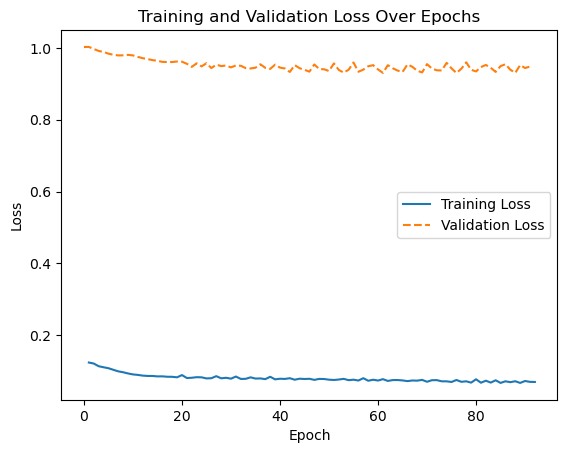

This is the best modelConvGRUModel(
  (convgru): GRU(768, 32, num_layers=5, batch_first=True, dropout=0.25)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)
Test Loss: 0.9300
[    0     1     2 ... 67506 67507 67508] [ 7501  7502  7503 ... 14999 15000 15001]
Validation subject: train_2
Training epoch [1/1000], Loss: 0.9973
Epoch [1/1000], Validation Loss: 0.9936
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [2/1000], Loss: 0.9877
Epoch [2/1000], Validation Loss: 0.9697
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [3/1000], Loss: 0.9400
Epoch [3/1000], Validation Loss: 0.8814
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [4/1000], Loss: 0.8770
Epoch [4/1000], Validation Loss: 0.7822
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [5/1000], Loss: 0.8696
Epoch [5/1000], Validation Loss: 0.7722
Saved mo

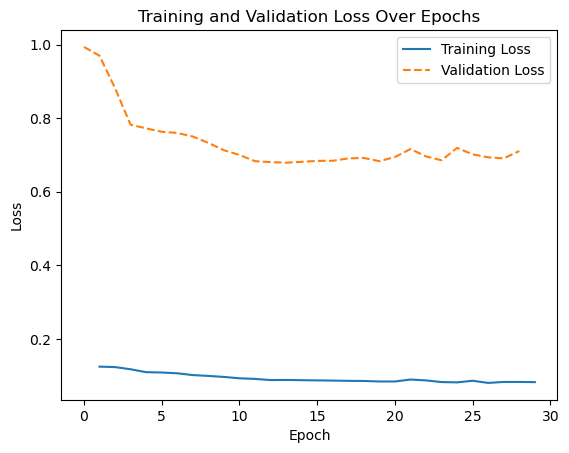

This is the best modelConvGRUModel(
  (convgru): GRU(768, 32, num_layers=5, batch_first=True, dropout=0.25)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)
Test Loss: 0.6790
[    0     1     2 ... 67506 67507 67508] [15002 15003 15004 ... 22500 22501 22502]
Validation subject: train_3
Training epoch [1/1000], Loss: 0.9990
Epoch [1/1000], Validation Loss: 0.9992
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [2/1000], Loss: 0.9938
Epoch [2/1000], Validation Loss: 0.9955
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [3/1000], Loss: 0.9715
Epoch [3/1000], Validation Loss: 0.9756
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [4/1000], Loss: 0.8787
Epoch [4/1000], Validation Loss: 0.9599
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [5/1000], Loss: 0.8690
Epoch [5/1000], Validation Loss: 0.9625
Training

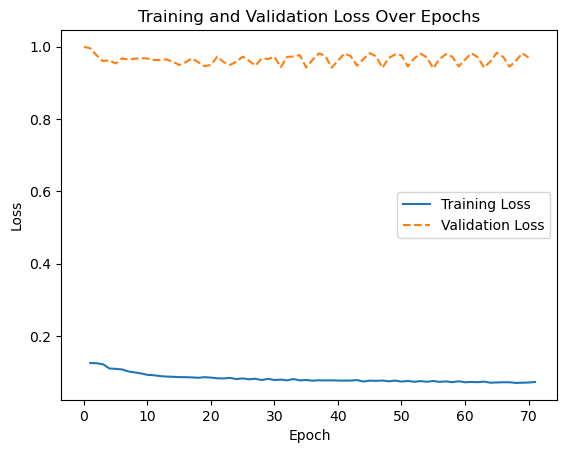

This is the best modelConvGRUModel(
  (convgru): GRU(768, 32, num_layers=5, batch_first=True, dropout=0.25)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)
Test Loss: 0.9400
[    0     1     2 ... 67506 67507 67508] [22503 22504 22505 ... 30001 30002 30003]
Validation subject: train_4
Training epoch [1/1000], Loss: 0.9972
Epoch [1/1000], Validation Loss: 1.0034
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [2/1000], Loss: 0.9772
Epoch [2/1000], Validation Loss: 1.0035
Training epoch [3/1000], Loss: 0.9200
Epoch [3/1000], Validation Loss: 0.9908
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [4/1000], Loss: 0.8864
Epoch [4/1000], Validation Loss: 0.9692
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [5/1000], Loss: 0.8695
Epoch [5/1000], Validation Loss: 0.9542
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training

Training epoch [74/1000], Loss: 0.5432
Epoch [74/1000], Validation Loss: 0.7913
Training epoch [75/1000], Loss: 0.5459
Epoch [75/1000], Validation Loss: 0.7922
Training epoch [76/1000], Loss: 0.5124
Epoch [76/1000], Validation Loss: 0.7837
Training epoch [77/1000], Loss: 0.5417
Epoch [77/1000], Validation Loss: 0.8423
Training epoch [78/1000], Loss: 0.5256
Epoch [78/1000], Validation Loss: 0.7834
Training epoch [79/1000], Loss: 0.5153
Epoch [79/1000], Validation Loss: 0.7812
Training epoch [80/1000], Loss: 0.5076
Epoch [80/1000], Validation Loss: 0.8004
Training epoch [81/1000], Loss: 0.5268
Epoch [81/1000], Validation Loss: 0.8172
Training epoch [82/1000], Loss: 0.4989
Epoch [82/1000], Validation Loss: 0.8109
Training epoch [83/1000], Loss: 0.5095
Epoch [83/1000], Validation Loss: 0.7832
Training epoch [84/1000], Loss: 0.5201
Epoch [84/1000], Validation Loss: 0.7808
Early stopping at epoch 84 as validation loss has not improved for 15 consecutive validations.
Best training epoch 68 at

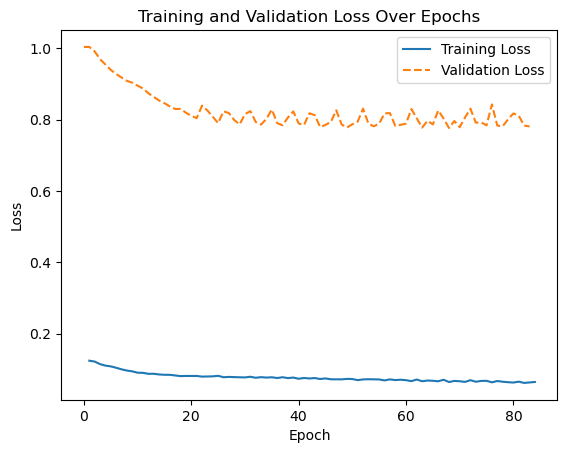

This is the best modelConvGRUModel(
  (convgru): GRU(768, 32, num_layers=5, batch_first=True, dropout=0.25)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)
Test Loss: 0.7765
[    0     1     2 ... 67506 67507 67508] [30004 30005 30006 ... 37502 37503 37504]
Validation subject: train_5
Training epoch [1/1000], Loss: 0.9960
Epoch [1/1000], Validation Loss: 0.9977
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [2/1000], Loss: 0.9799
Epoch [2/1000], Validation Loss: 0.9902
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [3/1000], Loss: 0.9260
Epoch [3/1000], Validation Loss: 0.9668
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [4/1000], Loss: 0.8878
Epoch [4/1000], Validation Loss: 0.9388
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [5/1000], Loss: 0.8697
Epoch [5/1000], Validation Loss: 0.9148
Saved mo

Training epoch [85/1000], Loss: 0.5403
Epoch [85/1000], Validation Loss: 0.8491
Training epoch [86/1000], Loss: 0.5286
Epoch [86/1000], Validation Loss: 0.8477
Training epoch [87/1000], Loss: 0.5320
Epoch [87/1000], Validation Loss: 0.8970
Training epoch [88/1000], Loss: 0.5113
Epoch [88/1000], Validation Loss: 0.8445
Training epoch [89/1000], Loss: 0.5262
Epoch [89/1000], Validation Loss: 0.8293
Training epoch [90/1000], Loss: 0.5363
Epoch [90/1000], Validation Loss: 0.8908
Training epoch [91/1000], Loss: 0.5233
Epoch [91/1000], Validation Loss: 0.8646
Training epoch [92/1000], Loss: 0.5276
Epoch [92/1000], Validation Loss: 0.8469
Training epoch [93/1000], Loss: 0.5270
Epoch [93/1000], Validation Loss: 0.8496
Training epoch [94/1000], Loss: 0.5143
Epoch [94/1000], Validation Loss: 0.8955
Training epoch [95/1000], Loss: 0.5145
Epoch [95/1000], Validation Loss: 0.8414
Training epoch [96/1000], Loss: 0.5101
Epoch [96/1000], Validation Loss: 0.8247
Training epoch [97/1000], Loss: 0.5368
E

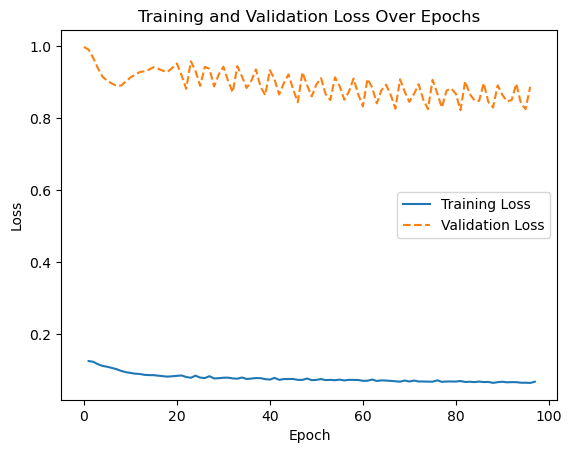

This is the best modelConvGRUModel(
  (convgru): GRU(768, 32, num_layers=5, batch_first=True, dropout=0.25)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)
Test Loss: 0.8218
[    0     1     2 ... 67506 67507 67508] [37505 37506 37507 ... 45003 45004 45005]
Validation subject: train_6
Training epoch [1/1000], Loss: 0.9964
Epoch [1/1000], Validation Loss: 0.9948
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [2/1000], Loss: 0.9837
Epoch [2/1000], Validation Loss: 0.9693
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [3/1000], Loss: 0.9297
Epoch [3/1000], Validation Loss: 0.8707
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [4/1000], Loss: 0.8584
Epoch [4/1000], Validation Loss: 0.8136
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [5/1000], Loss: 0.8546
Epoch [5/1000], Validation Loss: 0.8326
Training

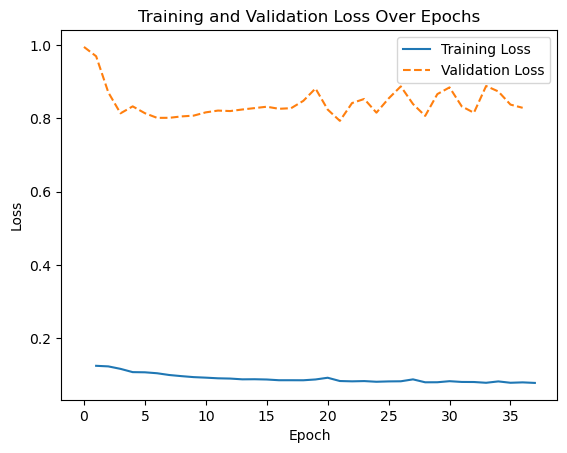

This is the best modelConvGRUModel(
  (convgru): GRU(768, 32, num_layers=5, batch_first=True, dropout=0.25)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)
Test Loss: 0.7930
[    0     1     2 ... 67506 67507 67508] [45006 45007 45008 ... 52504 52505 52506]
Validation subject: train_7
Training epoch [1/1000], Loss: 0.9973
Epoch [1/1000], Validation Loss: 0.9987
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [2/1000], Loss: 0.9857
Epoch [2/1000], Validation Loss: 0.9921
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [3/1000], Loss: 0.9410
Epoch [3/1000], Validation Loss: 0.9669
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [4/1000], Loss: 0.8573
Epoch [4/1000], Validation Loss: 0.9578
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [5/1000], Loss: 0.8532
Epoch [5/1000], Validation Loss: 0.9701
Training

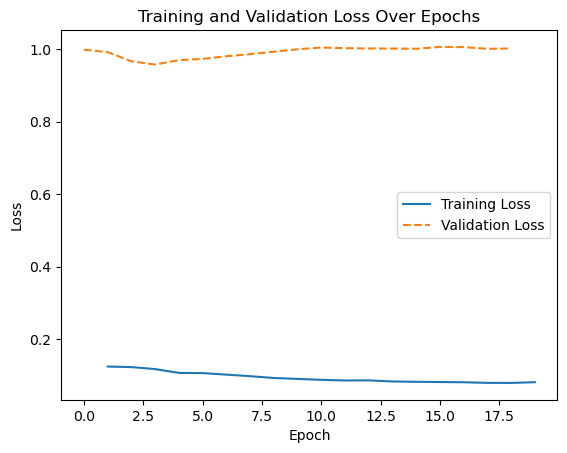

This is the best modelConvGRUModel(
  (convgru): GRU(768, 32, num_layers=5, batch_first=True, dropout=0.25)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)
Test Loss: 0.9578
[    0     1     2 ... 67506 67507 67508] [52507 52508 52509 ... 60005 60006 60007]
Validation subject: train_8
Training epoch [1/1000], Loss: 0.9996
Epoch [1/1000], Validation Loss: 0.9995
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [2/1000], Loss: 0.9975
Epoch [2/1000], Validation Loss: 0.9969
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [3/1000], Loss: 0.9880
Epoch [3/1000], Validation Loss: 0.9857
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [4/1000], Loss: 0.9394
Epoch [4/1000], Validation Loss: 0.9274
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [5/1000], Loss: 0.8472
Epoch [5/1000], Validation Loss: 0.8036
Saved mo

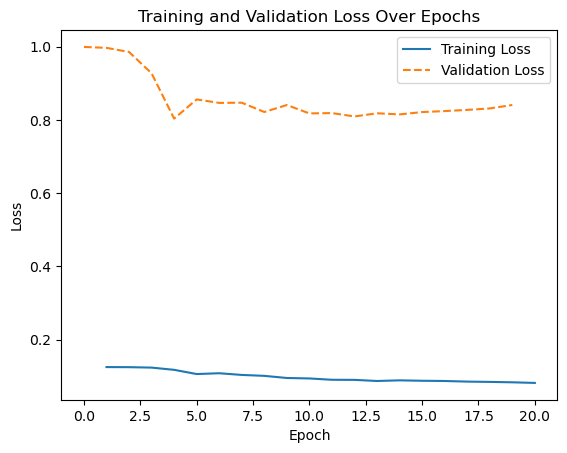

This is the best modelConvGRUModel(
  (convgru): GRU(768, 32, num_layers=5, batch_first=True, dropout=0.25)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)
Test Loss: 0.8036
[    0     1     2 ... 60005 60006 60007] [60008 60009 60010 ... 67506 67507 67508]
Validation subject: train_9
Training epoch [1/1000], Loss: 0.9991
Epoch [1/1000], Validation Loss: 0.9989
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [2/1000], Loss: 0.9947
Epoch [2/1000], Validation Loss: 0.9936
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [3/1000], Loss: 0.9767
Epoch [3/1000], Validation Loss: 0.9684
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [4/1000], Loss: 0.9010
Epoch [4/1000], Validation Loss: 0.8889
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [5/1000], Loss: 0.7978
Epoch [5/1000], Validation Loss: 0.8893
Training

Training epoch [78/1000], Loss: 0.4644
Epoch [78/1000], Validation Loss: 0.7725
Training epoch [79/1000], Loss: 0.4392
Epoch [79/1000], Validation Loss: 0.7518
Training epoch [80/1000], Loss: 0.4524
Epoch [80/1000], Validation Loss: 0.7515
Training epoch [81/1000], Loss: 0.4588
Epoch [81/1000], Validation Loss: 0.7389
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [82/1000], Loss: 0.4472
Epoch [82/1000], Validation Loss: 0.7715
Training epoch [83/1000], Loss: 0.4392
Epoch [83/1000], Validation Loss: 0.7489
Training epoch [84/1000], Loss: 0.4507
Epoch [84/1000], Validation Loss: 0.7477
Training epoch [85/1000], Loss: 0.4517
Epoch [85/1000], Validation Loss: 0.7343
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [86/1000], Loss: 0.4481
Epoch [86/1000], Validation Loss: 0.7702
Training epoch [87/1000], Loss: 0.4336
Epoch [87/1000], Validation Loss: 0.7438
Training epoch [88/1000], Loss: 0.4379
Epoch [88

Training epoch [161/1000], Loss: 0.4010
Epoch [161/1000], Validation Loss: 0.7108
Training epoch [162/1000], Loss: 0.3717
Epoch [162/1000], Validation Loss: 0.7090
Training epoch [163/1000], Loss: 0.4132
Epoch [163/1000], Validation Loss: 0.7063
Training epoch [164/1000], Loss: 0.3766
Epoch [164/1000], Validation Loss: 0.7015
Training epoch [165/1000], Loss: 0.4110
Epoch [165/1000], Validation Loss: 0.7199
Training epoch [166/1000], Loss: 0.3710
Epoch [166/1000], Validation Loss: 0.7079
Training epoch [167/1000], Loss: 0.3880
Epoch [167/1000], Validation Loss: 0.7041
Training epoch [168/1000], Loss: 0.3734
Epoch [168/1000], Validation Loss: 0.6949
Saved model with best validation loss to best_model_recola_valence_loso.pth
Training epoch [169/1000], Loss: 0.3924
Epoch [169/1000], Validation Loss: 0.7094
Training epoch [170/1000], Loss: 0.3692
Epoch [170/1000], Validation Loss: 0.7002
Training epoch [171/1000], Loss: 0.4022
Epoch [171/1000], Validation Loss: 0.7078
Training epoch [172/10

Training epoch [252/1000], Loss: 0.3781
Epoch [252/1000], Validation Loss: 0.6935
Training epoch [253/1000], Loss: 0.3464
Epoch [253/1000], Validation Loss: 0.6760
Training epoch [254/1000], Loss: 0.3484
Epoch [254/1000], Validation Loss: 0.7009
Training epoch [255/1000], Loss: 0.3626
Epoch [255/1000], Validation Loss: 0.6784
Training epoch [256/1000], Loss: 0.3431
Epoch [256/1000], Validation Loss: 0.6932
Training epoch [257/1000], Loss: 0.3541
Epoch [257/1000], Validation Loss: 0.6752
Early stopping at epoch 257 as validation loss has not improved for 15 consecutive validations.
Best training epoch 241 at validation.


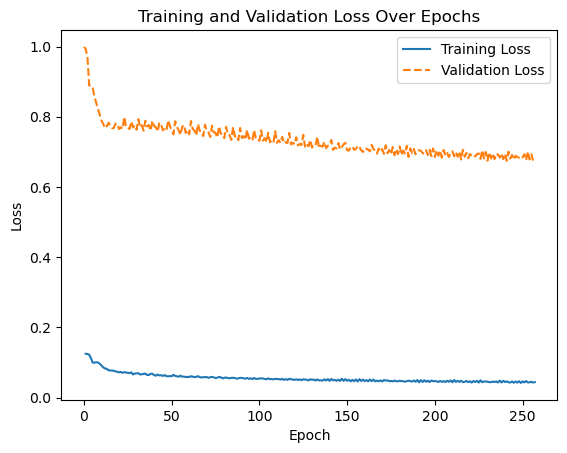

This is the best modelConvGRUModel(
  (convgru): GRU(768, 32, num_layers=5, batch_first=True, dropout=0.25)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)
Test Loss: 0.6743


In [26]:
# Valence

truth_wavlm, pred_wavlm = experiment(
    df_train_feat.iloc[:, 1:770],
    df_train_valence_lab['valence'],
    df_train_valence_lab['Subject'],
)

In [27]:
import audmetric

audmetric.concordance_cc(truth_wavlm, pred_wavlm)

0.2865951097793824

### Load devel dataset

#### Must select arousal or valence here

In [28]:
features2 = df_devel_feat.iloc[:, 1:770].values.astype(np.float32)
#features2 = df_devel_feat.values.astype(np.float32)


# Arousal
# labels2   = df_devel_arousal_lab['arousal'].values.astype(np.float32)

# Valence
labels2   = df_devel_valence_lab['valence'].values.astype(np.float32)

# Normalize the features between -1 and 1 (adjust scaling based on your data)
# features2 = (features - np.min(features)) / (np.max(features) - np.min(features)) * 2 - 1

# Convert data to PyTorch tensors
features_tensor2 = torch.from_numpy(features2)
labels_tensor2   = torch.from_numpy(labels2)

######
# Reshape features tensor with sequence length of 50
sequence_length = 1
num_features = features2.shape[1]
num_samples  = features2.shape[0]

# Calculate the number of sequences that can be formed
num_sequences = num_samples // sequence_length

# Truncate the tensor to fit the full sequences
features_tensor2 = features_tensor2[:num_sequences * sequence_length, :]
labels_tensor2   = labels_tensor2[:num_sequences * sequence_length]

# Reshape the tensor
features_tensor2 = features_tensor2.view(num_sequences, sequence_length, num_features)
######

### Load best model and predict

#### Must select arousal or valence here

In [29]:
# Load the best model for testing

# Arousal
# best_model_path = 'best_model_recola_arousal_loso.pth'  # Define the path to save the best model

# Valence
best_model_path = 'best_model_recola_valence_loso.pth'  # Define the path to save the best model

criterion = CCCLoss()

###############################################################################################
best_model = ConvGRUModel(input_size, hidden_size, num_layers, output_size, dropout_prob)
# best_model = ConvBLSTMModel(input_size, hidden_size, num_layers, output_size, dropout_prob)
###############################################################################################
best_model.load_state_dict(torch.load(best_model_path))
best_model.to(device)

with torch.no_grad():
    test_outputs = best_model(features_tensor2.to(device))
    test_loss    = criterion(test_outputs, labels_tensor2.unsqueeze(1).to(device))

print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 0.6928


In [30]:
pred = test_outputs.cpu().squeeze(1)
truth = labels_tensor2

### Arousal

#### Smooth function to smooth predictions

In [31]:
from pandas import DataFrame
from pandas import concat

def F_Smooth(prediction, win_width):

    df_pred = pd.DataFrame(prediction)
    width = win_width
    lag1 = df_pred.shift(1)
    lag3 = df_pred.shift(width - 1)
    window = lag3.rolling(window=width)
    means = window.mean()
    df_smoothed = concat([means, lag1, df_pred], axis=1)
    df_smoothed.columns = ['mean', 't-1', 't+1']
    df_smoothed['mean'] = df_smoothed['mean'].fillna(df_smoothed['t+1'])
    
    return df_smoothed['mean']

#### Predict on Devel set

In [32]:
import audmetric

print("CCC = " + str(audmetric.concordance_cc(truth, pred)))
print("MSE = " + str(audmetric.mean_absolute_error(truth, pred)))
print("MAE = " + str(audmetric.mean_squared_error(truth, pred)))

CCC = 0.3072210295185066
MSE = 0.11126753687858582
MAE = 0.020967859774827957


In [33]:
print("CCC = " + str(audmetric.concordance_cc(truth, F_Smooth(pred, 5)))  + "  ( 5) ")
print("CCC = " + str(audmetric.concordance_cc(truth, F_Smooth(pred, 10))) + "  (10) ")
print("CCC = " + str(audmetric.concordance_cc(truth, F_Smooth(pred, 15))) + "  (15) ")
print("CCC = " + str(audmetric.concordance_cc(truth, F_Smooth(pred, 20))) + "  (20) ")
print("CCC = " + str(audmetric.concordance_cc(truth, F_Smooth(pred, 25))) + "  (25) ")
print("CCC = " + str(audmetric.concordance_cc(truth, F_Smooth(pred, 30))) + "  (30) ")
print("CCC = " + str(audmetric.concordance_cc(truth, F_Smooth(pred, 35))) + "  (35) ")
print("CCC = " + str(audmetric.concordance_cc(truth, F_Smooth(pred, 40))) + "  (40) ")

print("MSE = " + str(audmetric.mean_absolute_error(truth, F_Smooth(pred, 20)))+ " (20)")
print("MAE = " + str(audmetric.mean_squared_error(truth, F_Smooth(pred, 20)))+ " (20)")

CCC = 0.35781406314148195  ( 5) 
CCC = 0.38033598447406525  (10) 
CCC = 0.3923738816494554  (15) 
CCC = 0.3991458991499746  (20) 
CCC = 0.40248866381869813  (25) 
CCC = 0.4033851836478193  (30) 
CCC = 0.402138972993146  (35) 
CCC = 0.3989592177750546  (40) 
MSE = 0.09416262138560429 (20)
MAE = 0.014861260034896916 (20)


### Valence

In [34]:
import audmetric

print("CCC = " + str(audmetric.concordance_cc(truth, pred)))
print("MSE = " + str(audmetric.mean_absolute_error(truth, pred)))
print("MAE = " + str(audmetric.mean_squared_error(truth, pred)))

CCC = 0.3072210295185066
MSE = 0.11126753687858582
MAE = 0.020967859774827957


In [35]:
print("CCC = " + str(audmetric.concordance_cc(truth, F_Smooth(pred, 5))))
print("CCC = " + str(audmetric.concordance_cc(truth, F_Smooth(pred, 10))))
print("CCC = " + str(audmetric.concordance_cc(truth, F_Smooth(pred, 15))))
print("CCC = " + str(audmetric.concordance_cc(truth, F_Smooth(pred, 20))))
print("CCC = " + str(audmetric.concordance_cc(truth, F_Smooth(pred, 25))))
print("CCC = " + str(audmetric.concordance_cc(truth, F_Smooth(pred, 30))))
print("CCC = " + str(audmetric.concordance_cc(truth, F_Smooth(pred, 35))))
print("CCC = " + str(audmetric.concordance_cc(truth, F_Smooth(pred, 40))))
print("CCC = " + str(audmetric.concordance_cc(truth, F_Smooth(pred, 45))))
print("CCC = " + str(audmetric.concordance_cc(truth, F_Smooth(pred, 50))))

print("MSE = " + str(audmetric.mean_absolute_error(truth, F_Smooth(pred, 25))))
print("MAE = " + str(audmetric.mean_squared_error(truth, F_Smooth(pred, 25))))

CCC = 0.35781406314148195
CCC = 0.38033598447406525
CCC = 0.3923738816494554
CCC = 0.3991458991499746
CCC = 0.40248866381869813
CCC = 0.4033851836478193
CCC = 0.402138972993146
CCC = 0.3989592177750546
CCC = 0.394327090017952
CCC = 0.38862483083601224
MSE = 0.09327882927061686
MAE = 0.014589476074019692


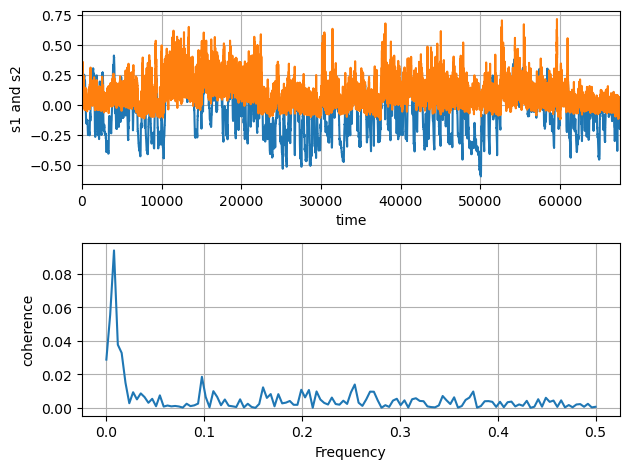

In [36]:
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)
predict_y = F_Smooth(pred, 5)

dt = 1
t = np.arange(0, len(predict_y), dt)
s1 = df_devel_arousal_lab['arousal']
s2 = predict_y                # white noise 2

fig, axs = plt.subplots(2, 1)
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, len(predict_y))
axs[0].set_xlabel('time')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('coherence')

fig.tight_layout()
plt.show()

<Figure size 20000x600 with 0 Axes>

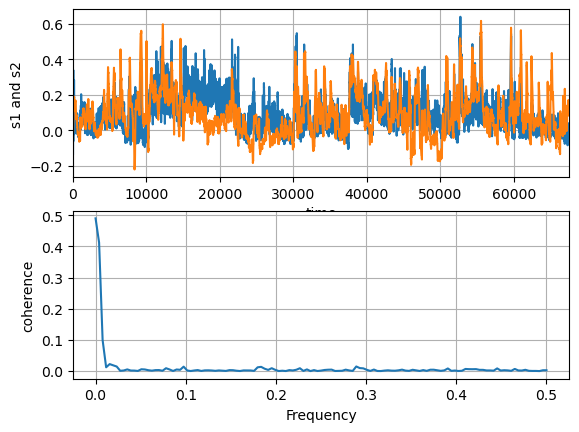

In [37]:
# Fixing random state for reproducibility
np.random.seed(19680801)

plt.figure(figsize=(200,6))
#fig.tight_layout()

predict_y = F_Smooth(pred, 20)

dt = 1
t = np.arange(0, len(predict_y), dt)
s1 = df_devel_valence_lab['valence']
s2 = predict_y               # white noise 2

fig, axs = plt.subplots(2, 1)
axs[0].plot(t, s2, t, s1)
axs[0].set_xlim(0, len(predict_y))
axs[0].set_xlabel('time')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('coherence')

#plt.figure(figsize=(20,6))
#fig.tight_layout()
plt.show()